<a href="https://colab.research.google.com/github/hbbalamsyah/credit-score-using-logistic-regression/blob/main/Credit_Score_Using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv")

<ipython-input-31-f2e37d73a91a>:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/rakamin/loan_data_2007_2014.csv")


In [ ]:
# shows count of rows and columns
df.shape

(466285, 75)

In [ ]:
#shows first few rows of the code
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [ ]:
# menghitung korelasi
corr = df['loan_amnt'].corr(df['funded_amnt'], method='pearson')

# menampilkan korelasi
print("Korelasi antara kolom_1 dan kolom_2 adalah:", corr)

Korelasi antara kolom_1 dan kolom_2 adalah: 0.9985475468235333


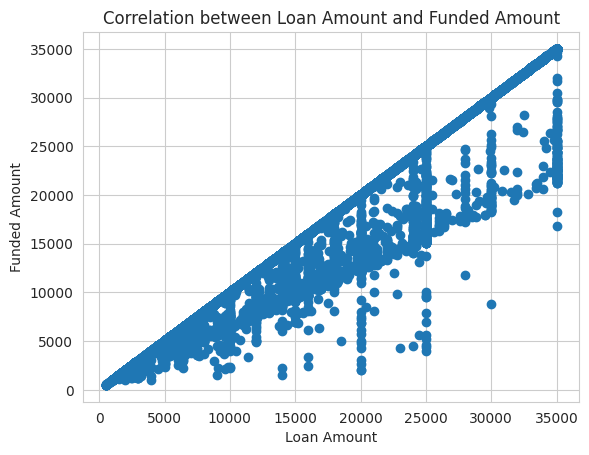

In [ ]:

import matplotlib.pyplot as plt


# membuat scatter plot
plt.scatter(df['loan_amnt'], df['funded_amnt'])

# memberi judul grafik dan sumbu x serta y
plt.title('Correlation between Loan Amount and Funded Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Funded Amount')

# menampilkan grafik
plt.show()


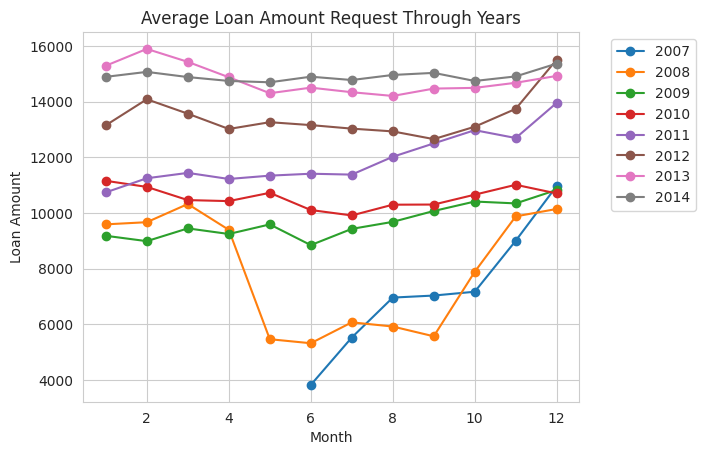

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['year'] = df['issue_d'].dt.year
df['month'] = df['issue_d'].dt.month
data = df.groupby(['year', 'month'])['loan_amnt'].mean().reset_index()

# membuat grafik garis
for year in data['year'].unique():
    plt.plot(data[data['year']==year]['month'], data[data['year']==year]['loan_amnt'], label=year, marker='o')



# memberi judul grafik dan sumbu x serta y
plt.title('Average Loan Amount Request Through Years')
plt.xlabel('Month')
plt.ylabel('Loan Amount')


# menampilkan grafik
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

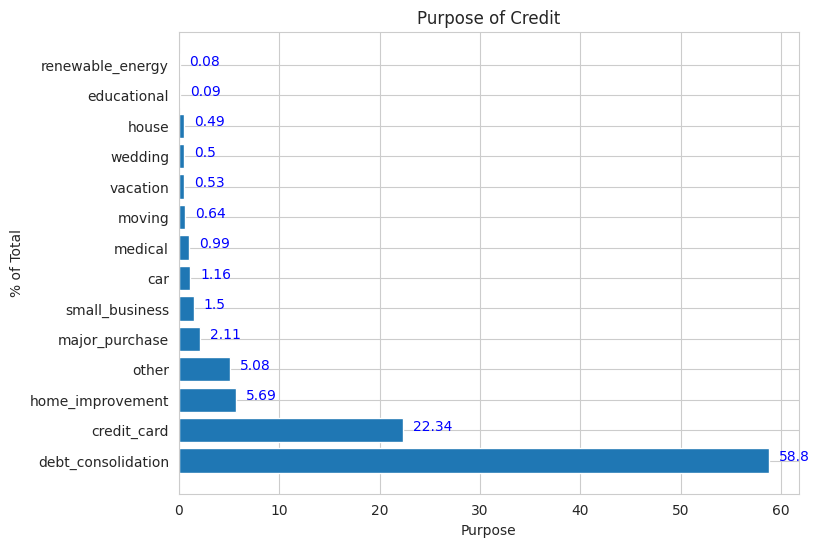

In [ ]:
# hitung persentase setiap tujuan
purpose_perc = df['purpose'].value_counts(normalize=True) * 100

# visualisasi
plt.figure(figsize=(8,6))
bars = plt.barh(purpose_perc.index, purpose_perc.values)
plt.xlabel('Purpose')
plt.ylabel('% of Total')
plt.title('Purpose of Credit')

for i, v in enumerate(purpose_perc.values):
    plt.text(v + 1, i, str(round(v,2)), color='blue', fontsize=10)

plt.show()

In [ ]:
# Drop Kolom Identitas (semua unik)
df = df.drop (['Unnamed: 0', 'id', 'member_id', 'zip_code', 'addr_state'], axis=1 )

# kolom dengan high cardinality tinggi (kolom dengan kategori uniqe tinggi) 
df = df.drop (['emp_title'], axis=1 )

# kolom dengan kategori tertentu sangat dominan  
df = df.drop (['pymnt_plan', 'policy_code'], axis=1 )

# kolom free text
df = df.drop (['url', 'desc', 'title'], axis=1 )

# Kolom yang mempunyai korelasi tinggi dengan kolom lainnya (bukan dengan label) 
df = df.drop (['total_pymnt_inv', 'funded_amnt', 'funded_amnt_inv', 'out_prncp_inv'], axis=1 )

# kolom yang tidak relevan
df = df.drop (['next_pymnt_d'], axis=1 )

In [ ]:
nulls = pd.DataFrame(round(df.isnull().sum()/len(df.index)*100,2),columns=['null_percent'])
#sns.barplot(x='index',y='null_percent',data=nulls.reset_index())
nulls[nulls['null_percent']!=0.00].sort_values('null_percent',ascending=False)

,null_percent
inq_last_12m,100.00
open_rv_12m,100.00
open_il_6m,100.00
open_acc_6m,100.00
mths_since_rcnt_il,100.00
verification_status_joint,100.00
dti_joint,100.00
annual_inc_joint,100.00
total_bal_il,100.00
open_il_24m,100.00


In [ ]:
# Drop kolom yang mempunya missing values > 78%
cols_to_drop = nulls[nulls['null_percent'] > 78.0].index
df = df.drop(cols_to_drop, axis=1)

In [ ]:
# mengisi missing values dengan 0 pada kolom tertentu
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)

In [ ]:
# Menghapus baris yang mengandung missing values
df = df.dropna()
# explore missing values
g = df.isna().sum()
print(g)

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pym

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,year,month
42535,27050,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,...,885.46,Dec-15,0.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,2013,12
42536,9750,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,...,333.14,Jan-16,0.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,2013,12
42537,12000,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,...,368.45,Jan-16,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,2013,12
42538,12000,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,...,119.17,Jan-16,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,2013,12
42539,15000,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,...,476.30,Jan-16,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,2013,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,60 months,14.47,432.64,C,C2,4 years,MORTGAGE,110000.0,Source Verified,...,432.64,Jan-16,0.0,INDIVIDUAL,0.0,0.0,294998.0,29900.0,2014,1
466281,22000,60 months,19.97,582.50,D,D5,10+ years,MORTGAGE,78000.0,Verified,...,17.50,Jan-16,0.0,INDIVIDUAL,0.0,0.0,221830.0,39400.0,2014,1
466282,20700,60 months,16.99,514.34,D,D1,7 years,MORTGAGE,46000.0,Verified,...,514.34,Dec-15,0.0,INDIVIDUAL,0.0,0.0,73598.0,13100.0,2014,1
466283,2000,36 months,7.90,62.59,A,A4,3 years,OWN,83000.0,Verified,...,1500.68,Apr-15,0.0,INDIVIDUAL,0.0,0.0,591610.0,53100.0,2014,1


Labeling Target

In [ ]:

# mapping kategori C menjadi B
df['loan_status'] = df['loan_status'].replace('Fully Paid', 'Current')

# menampilkan jumlah data di masing-masing kategori
print(df['loan_status'].value_counts())

Current               335036
Charged Off            30291
Late (31-120 days)      6376
In Grace Period         2978
Late (16-30 days)       1123
Default                  767
Name: loan_status, dtype: int64


In [ ]:
target = [0 if i=='Current' else 1 for i in df['loan_status']]
df['target'] = target
df['target'].value_counts()

0    335036
1     41535
Name: target, dtype: int64

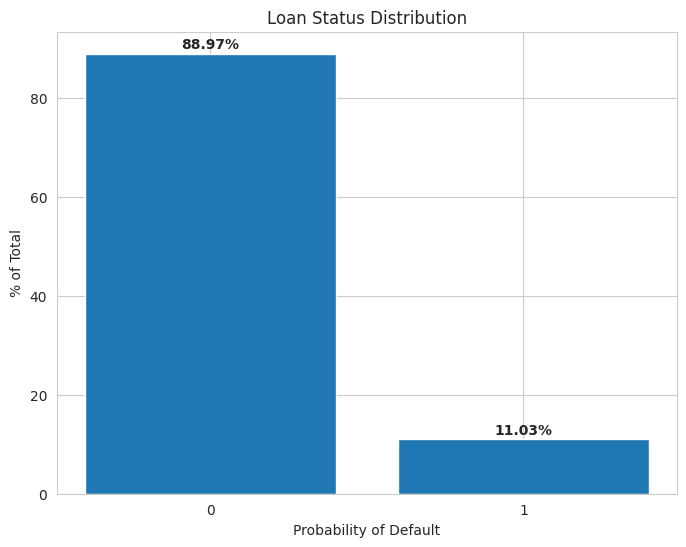

In [ ]:
#Grafik
# hitung persentase tiap kategori
target_perc = df['target'].value_counts(normalize=True) * 100

# visualisasi
plt.figure(figsize=(8,6))
plt.bar(target_perc.index, target_perc.values)
plt.xticks(target_perc.index, ['0', '1'])
plt.xlabel('Probability of Default')
plt.ylabel('% of Total')
plt.title('Loan Status Distribution')

# tambahkan label pada setiap bar
for i, v in enumerate(target_perc.values):
    plt.text(i, v+1, str(round(v,2))+'%', horizontalalignment='center', fontweight='bold')
    
plt.show()

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,year,month,target
42535,27050,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,Verified,...,Dec-15,0.0,INDIVIDUAL,0.0,0.0,114834.0,59900.0,2013,12,0
42536,9750,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,Not Verified,...,Jan-16,0.0,INDIVIDUAL,0.0,0.0,14123.0,15100.0,2013,12,0
42537,12000,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,Not Verified,...,Jan-16,0.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,2013,12,0
42538,12000,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,Source Verified,...,Jan-16,0.0,INDIVIDUAL,0.0,15386.0,13605.0,8100.0,2013,12,0
42539,15000,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,Not Verified,...,Jan-16,0.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,2013,12,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

# membuat instance dari LabelEncoder
le = LabelEncoder()

# melakukan label encoding pada kolom grade
df['term'] = le.fit_transform(df['term'])
df['grade'] = le.fit_transform(df['grade'])
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df['emp_length'] = le.fit_transform(df['emp_length'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])
df['application_type'] = le.fit_transform(df['application_type'])
df['purpose'] = le.fit_transform(df['purpose'])
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])
df['last_pymnt_d'] = le.fit_transform(df['last_pymnt_d'])


# convert the 'earliest_cr_line' column to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')

df['earliest_cr_line'] = (df['issue_d'] - df['earliest_cr_line']) / np.timedelta64(1, 'M')
df['last_credit_pull_d'] = (df['issue_d'] - df['last_credit_pull_d']) / np.timedelta64(1, 'M')

df = df.drop('issue_d', axis=1)

In [ ]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,year,month,target
42535,27050,0,10.99,885.46,1,6,1,4,55000.0,2,...,-23.984065,0.0,0,0.0,0.0,114834.0,59900.0,2013,12,0
42536,9750,0,13.98,333.14,2,10,0,5,26000.0,0,...,-25.002567,0.0,0,0.0,0.0,14123.0,15100.0,2013,12,0
42537,12000,0,6.62,368.45,0,1,1,1,105000.0,0,...,-25.002567,0.0,0,0.0,0.0,267646.0,61100.0,2013,12,0
42538,12000,0,13.53,407.40,1,9,1,5,40000.0,1,...,-25.002567,0.0,0,0.0,15386.0,13605.0,8100.0,2013,12,0
42539,15000,0,8.90,476.30,0,4,2,1,63000.0,0,...,-25.002567,0.0,0,0.0,1514.0,272492.0,15400.0,2013,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,1,14.47,432.64,2,11,4,1,110000.0,1,...,-23.984065,0.0,0,0.0,0.0,294998.0,29900.0,2014,1,0
466281,22000,1,19.97,582.50,3,19,1,1,78000.0,2,...,-23.984065,0.0,0,0.0,0.0,221830.0,39400.0,2014,1,1
466282,20700,1,16.99,514.34,3,15,7,1,46000.0,2,...,-22.965564,0.0,0,0.0,0.0,73598.0,13100.0,2014,1,0
466283,2000,0,7.90,62.59,0,3,3,4,83000.0,2,...,-14.948972,0.0,0,0.0,0.0,591610.0,53100.0,2014,1,0


In [ ]:
print(df.dtypes)

loan_amnt                       int64
term                            int64
int_rate                      float64
installment                   float64
grade                           int64
sub_grade                       int64
emp_length                      int64
home_ownership                  int64
annual_inc                    float64
verification_status             int64
loan_status                    object
purpose                         int64
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              float64
inq_last_6mths                float64
mths_since_last_delinq        float64
open_acc                      float64
pub_rec                       float64
revol_bal                       int64
revol_util                    float64
total_acc                     float64
initial_list_status             int64
out_prncp                     float64
total_pymnt                   float64
total_rec_prncp               float64
total_rec_in

Modelling

In [ ]:

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix




# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(['loan_status', 'target'], axis=1), df['target'], test_size=0.3, random_state=42)

# logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict using the model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# classification report
print(classification_report(y_test, y_pred))

print('Accuracy score :', accuracy)




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    100481
           1       1.00      0.72      0.83     12491

    accuracy                           0.97    112972
   macro avg       0.98      0.86      0.91    112972
weighted avg       0.97      0.97      0.97    112972

Accuracy score : 0.9682753248592572


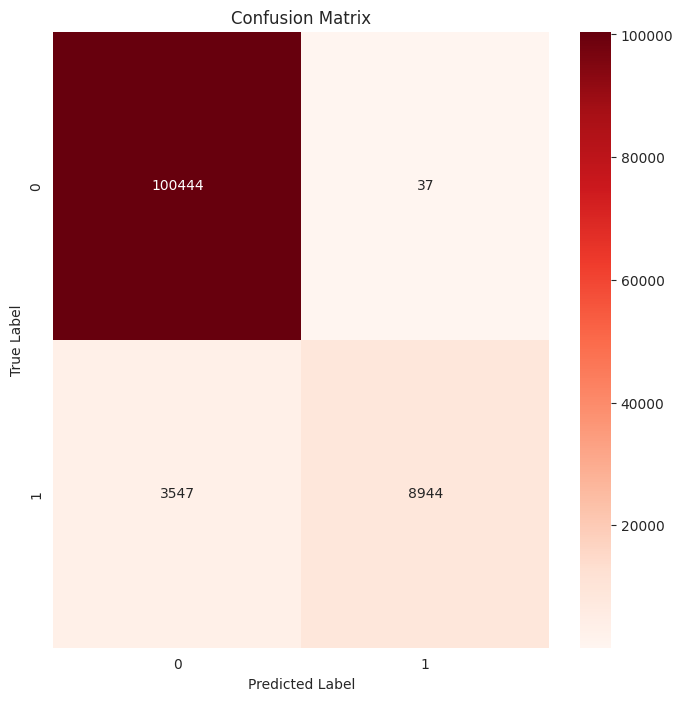

In [ ]:
import seaborn as sns

# Calculate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Create the heatmap using Seaborn
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap='Reds')

# Set the plot labels
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix")

# Show the plot
plt.show()